### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import warnings
import pickle

In [2]:
warnings.filterwarnings(action="ignore")
pd.options.display.max_columns = None

## Read data

In [3]:
def readCsvFile(filepath):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """
    
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    df.drop(df.columns[-1], inplace=True, axis = 1)
    
    return df

In [4]:
raw_aid_df = readCsvFile('../data/API_DT.ODA.ALLD.CD_DS2_en_csv_v2_5362759.csv')
raw_infltn_df = readCsvFile("../data/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5358428.csv")
raw_pvrty_df = readCsvFile("../data/API_SI.POV.DDAY_DS2_en_csv_v2_5358982.csv")
raw_unemplmnt_df = readCsvFile("../data/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv")
cntry_code_dtl = readCsvFile('../data/country_code_dtls.csv')

In [5]:
with open("../data/latin_america_southeast_asia_usaid_complete.pickle", "rb") as file_:
    raw_us_aid = pickle.load(file_)

# EDA

In [6]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America


In [7]:
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)

In [8]:
raw_us_aid['fiscal_year'] = raw_us_aid['fiscal_year'].astype(int)

In [9]:
# aid in millions
raw_us_aid['amount_in_mil'] = (raw_us_aid['constant_dollar_amount'].astype(float)/1000000).round(2)

In [10]:
plot_df = raw_us_aid.groupby(['us_category_name', 'fiscal_year','region_extd'])\
                .agg({'amount_in_mil':np.nanmean}).reset_index()

Text(0.5, 1.0, 'Average US Aid to Latin America by Category : 2001 - 2022')

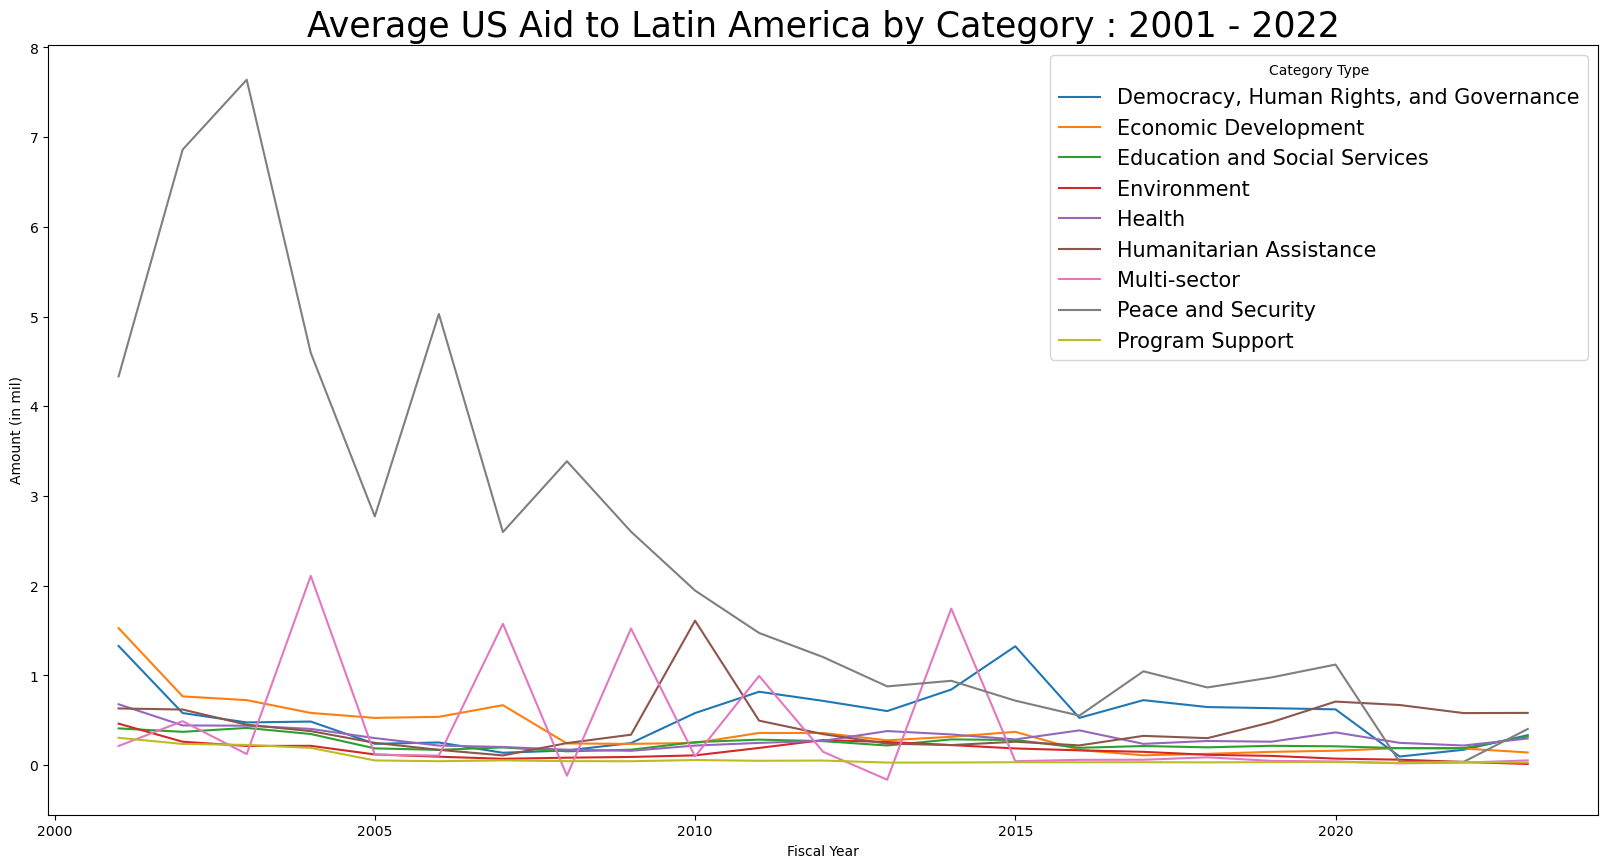

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(y = "amount_in_mil", 
            x = "fiscal_year",
             data = plot_df[(plot_df.region_extd=='Latin America') & (plot_df.fiscal_year>2000)], 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount (in mil)")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("Average US Aid to Latin America by Category : 2001 - 2022", fontsize=25)

In [12]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [13]:
raw_us_aid.us_category_name.value_counts()

Program Support                            236488
Health                                      75476
Economic Development                        73716
Democracy, Human Rights, and Governance     71508
Peace and Security                          63860
Education and Social Services               44551
Humanitarian Assistance                     39938
Environment                                 31620
Multi-sector                                 2663
Name: us_category_name, dtype: int64

In [14]:
plot_df = raw_us_aid.query("transaction_type_name == 'Disbursements'")\
        .groupby(["fiscal_year", "us_category_name"]).agg({'country_id':"nunique"}).reset_index()\
        .sort_values("fiscal_year", ascending=True)

In [15]:
plot_df.head()

,fiscal_year,us_category_name,country_id
0,2001,"Democracy, Human Rights, and Governance",28
1,2001,Economic Development,26
2,2001,Education and Social Services,21
3,2001,Environment,15
4,2001,Health,20


Text(0.5, 1.0, 'US Aid Recipient Countries by Category')

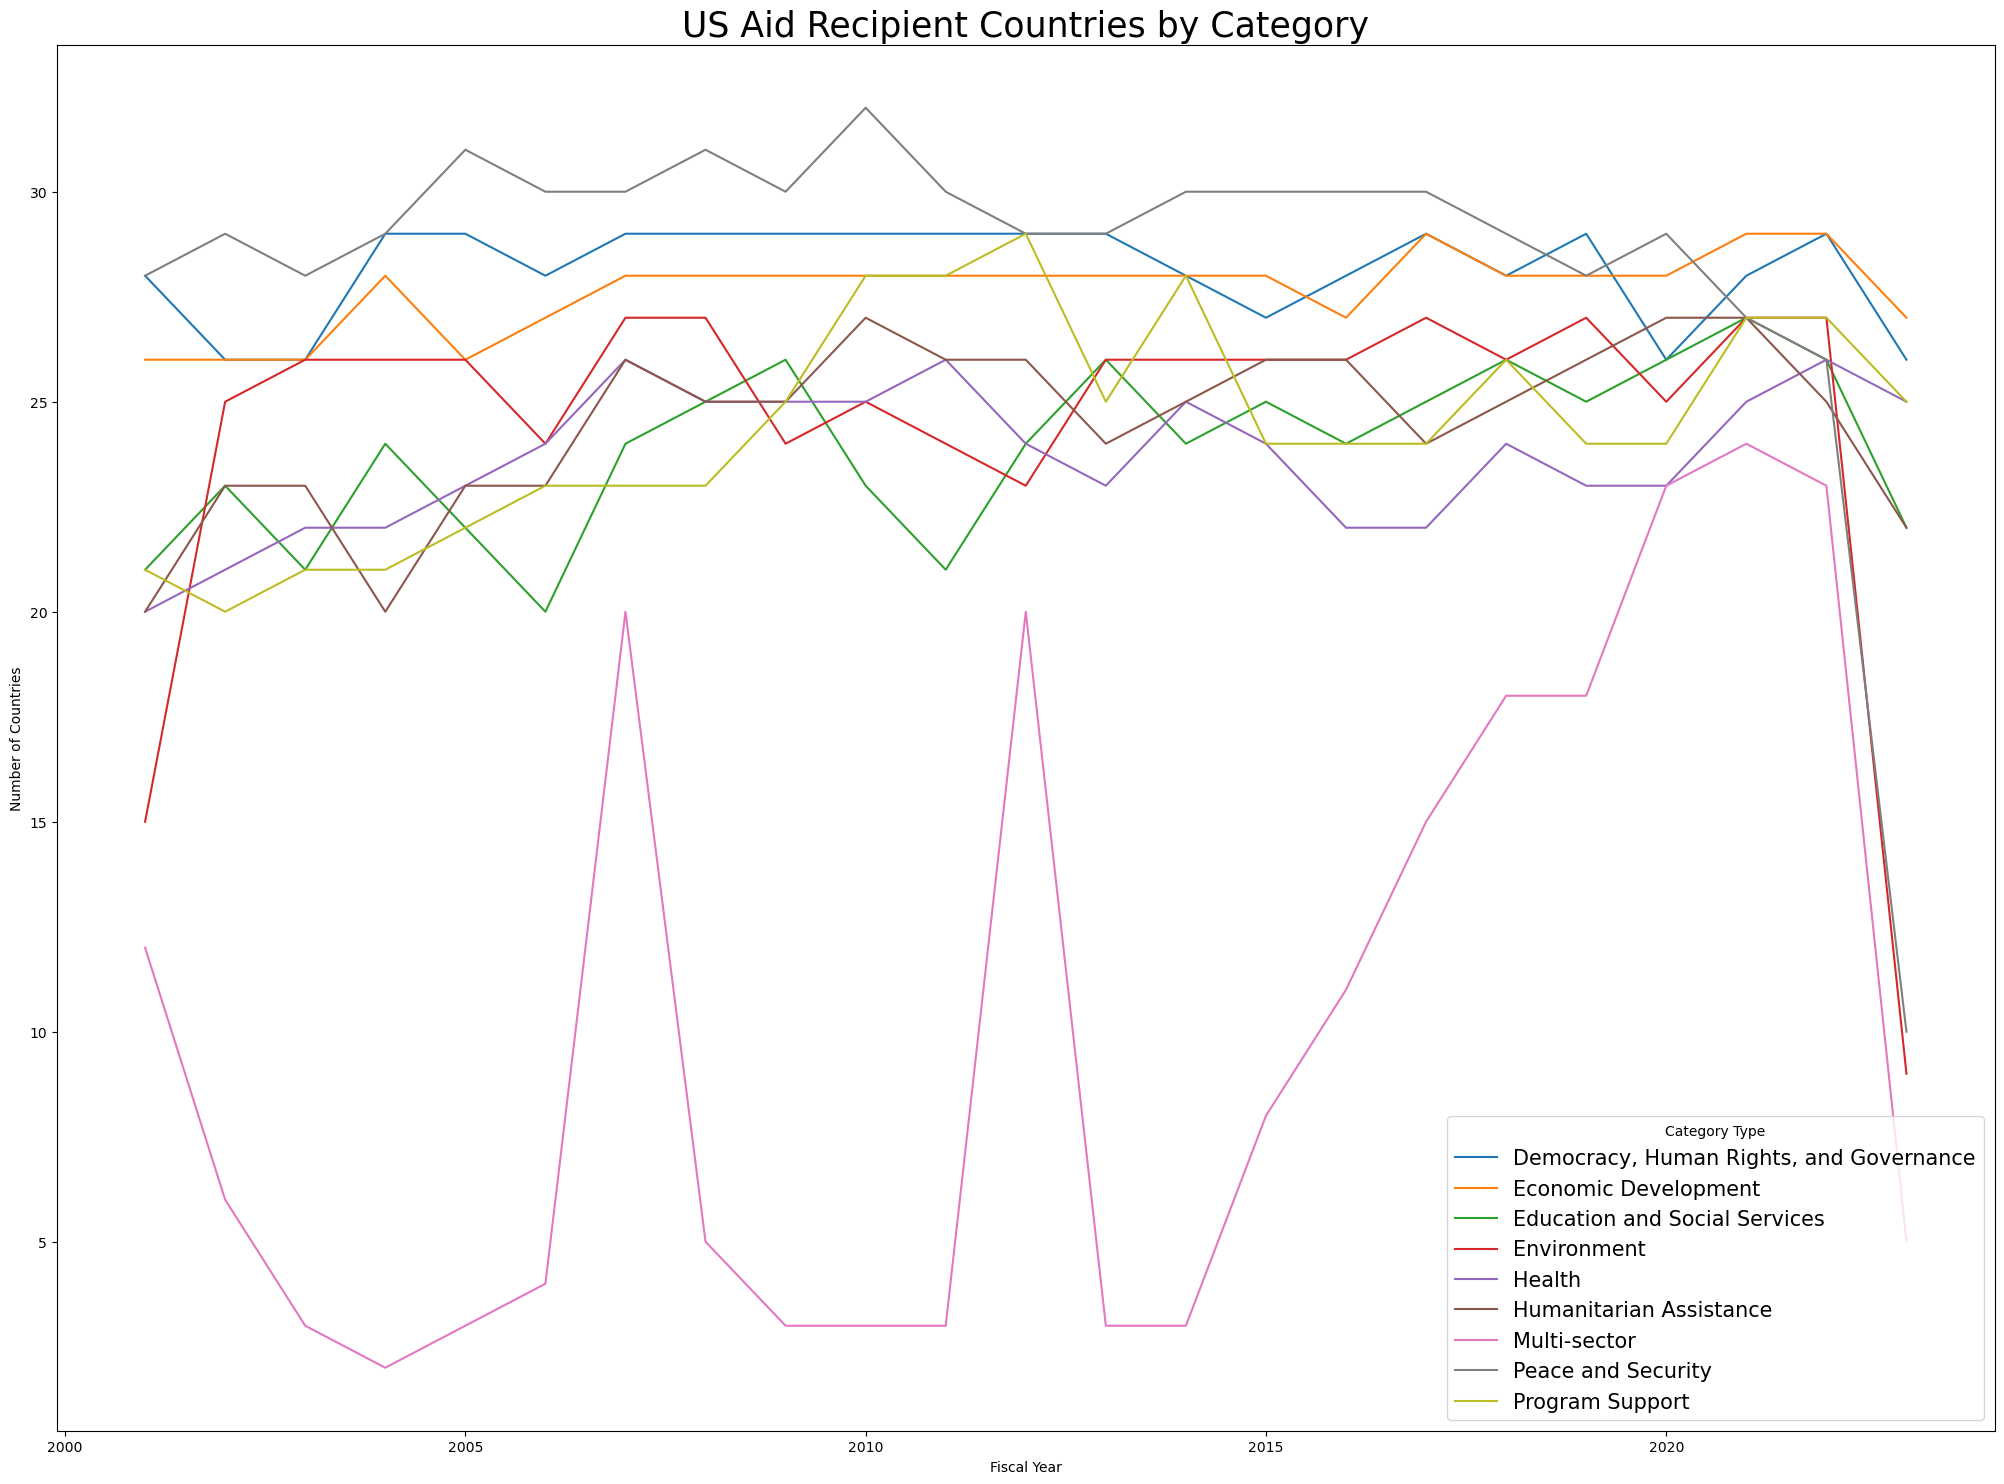

In [16]:
plt.figure(figsize=(25, 18))
sns.lineplot(y = "country_id", 
            x = "fiscal_year",
             data = plot_df, 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Countries")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("US Aid Recipient Countries by Category", fontsize=25)

In [17]:
raw_us_aid[raw_us_aid.fiscal_year==1960]['transaction_type_name'].value_counts()

Obligations    146
Name: transaction_type_name, dtype: int64

In [18]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [19]:
tmp_df = raw_us_aid.groupby(["fiscal_year", "transaction_type_name"])\
                    .agg({"funding_agency_acronym":"unique"}).reset_index()

In [20]:
# tmp_df = tmp_df.set_index(['fiscal_year','transaction_type_name']).unstack(fill_value=0).stack().reset_index()

In [21]:
tmp_df['funding_agency_acronym'] = np.where(tmp_df.funding_agency_acronym.isin([0]), 0, 1)

<AxesSubplot:xlabel='fiscal_year', ylabel='constant_dollar_amount'>

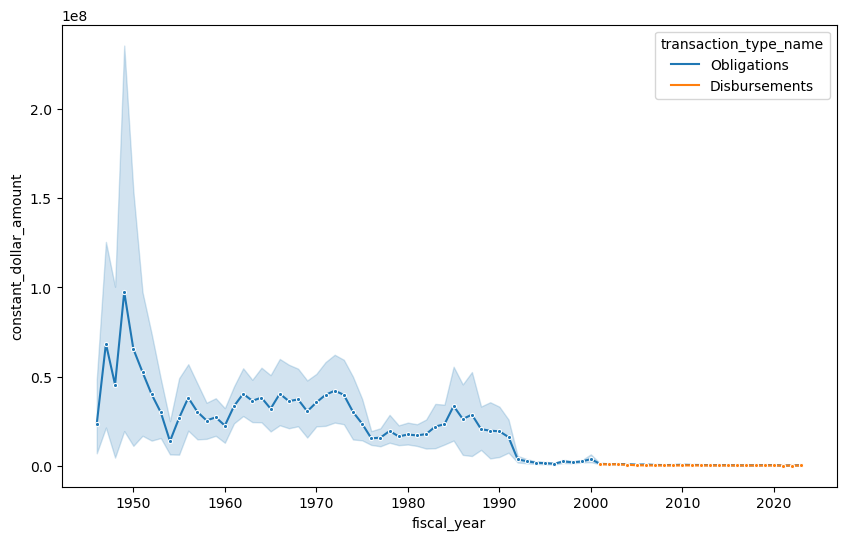

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fiscal_year', y = "constant_dollar_amount", data = raw_us_aid,
             marker = ".",
             hue = "transaction_type_name")

In [23]:
raw_us_aid.groupby("fiscal_year")\
        .agg({'constant_dollar_amount':[np.nanmin, np.nanmean, np.nanmedian, np.nanmax]}).reset_index()

fiscal_year constant_dollar_amount                                     
                               nanmin       nanmean  nanmedian      nanmax
0         1946                  10895  2.353956e+07  4357895.0   308321053
1         1947                   9823  6.844354e+07  3929249.0   647343831
2         1948                   8972  4.544875e+07  2691489.0   767971631
3         1949               -2603277  9.742930e+07  3471037.0  1549817835
4         1950                   8798  6.546567e+07  3959235.0  1213285549
..         ...                    ...           ...        ...         ...
73        2019              -29280006  1.998736e+05     7208.5   270269506
74        2020              -10000000  2.170955e+05    10000.0   268679844
75        2021               -8439579  9.426396e+04     2445.0    47691527
76        2022               -6011229  1.312358e+05     6541.0    55037317
77        2023               -1420875  1.522202e+05    10089.5    47362509

[78 rows x 5 columns]

# Transformation

In [24]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [25]:
raw_us_aid.groupby(['fiscal_year', "us_category_name", "transaction_type_name"]).size().reset_index()

,fiscal_year,us_category_name,transaction_type_name,0
0,1946,Economic Development,Obligations,33
1,1947,Economic Development,Obligations,37
2,1948,Economic Development,Obligations,35
3,1949,Economic Development,Obligations,29
4,1950,Economic Development,Obligations,32
...,...,...,...,...
526,2023,Multi-sector,Disbursements,7
527,2023,Peace and Security,Disbursements,50
528,2023,Peace and Security,Obligations,3
529,2023,Program Support,Disbursements,2320


In [26]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.0
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.0


In [27]:
raw_us_aid.groupby(['country_name', "us_category_name",
                    "transaction_type_name", "foreign_assistance_objective_name"])\
        .agg({'fiscal_year':'unique'}).reset_index()

,country_name,us_category_name,transaction_type_name,foreign_assistance_objective_name,fiscal_year
0,Argentina,"Democracy, Human Rights, and Governance",Disbursements,Economic,"[2016, 2017, 2020, 2011, 2007, 2008, 2005, 200..."
1,Argentina,"Democracy, Human Rights, and Governance",Obligations,Economic,"[2017, 2015, 2012, 2020, 2011, 2007, 2021, 200..."
2,Argentina,Economic Development,Disbursements,Economic,"[2016, 2012, 2021, 2018, 2020, 2019, 2015, 201..."
3,Argentina,Economic Development,Obligations,Economic,"[1963, 1989, 1991, 1992, 1993, 1994, 1959, 196..."
4,Argentina,Economic Development,Obligations,Military,"[1962, 1964, 1965, 1966, 1972, 1963, 1967, 196..."
...,...,...,...,...,...
617,Vietnam,Peace and Security,Disbursements,Military,"[2016, 2006, 2008, 2009, 2010, 2011, 2012, 201..."
618,Vietnam,Peace and Security,Obligations,Economic,"[2008, 2009, 2010, 2013, 2012, 2018, 2011, 201..."
619,Vietnam,Peace and Security,Obligations,Military,"[2006, 2008, 2009, 2010, 2011, 2012, 2013, 201..."
620,Vietnam,Program Support,Disbursements,Economic,"[2015, 2017, 2018, 2019, 2020, 2022, 2008, 202..."


In [28]:
raw_us_aid.transaction_type_name.value_counts()

Disbursements    406864
Obligations      232956
Name: transaction_type_name, dtype: int64

In [29]:
# split the data into transaction types
oblgtn_df = raw_us_aid.query("transaction_type_name == 'Obligations'")
disbrsmnt_df = raw_us_aid.query("transaction_type_name != 'Obligations'")

In [30]:
oblgtn_df.shape, disbrsmnt_df.shape

((232956, 61), (406864, 61))

# Level - 1

## Disbursement clustering

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import silhouette_visualizer, SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
def transformForClustering(data_frame, levels):
    """
        Function to transform the data for clustering task
        args:
            data_frame: dataframe with 'country_name', "us_category_name",
                        "transaction_type_name", "fiscal_year", "constalt_dollar_amount"
            levels: list of levels for transformation
        return:
            transformed_df: transformed data for clustering tasl
    """
    
    transformed_df = data_frame.pivot_table(index=levels,
                         columns="fiscal_year", 
                        values = "constant_dollar_amount", 
                         margins=True,
                        aggfunc='sum')
    
    return transformed_df.reset_index()

In [33]:
transformed_disbrsmnt_df = transformForClustering(disbrsmnt_df, levels=['country_name', "country_code", 
                                                   "international_category_name", "transaction_type_name"])

transformed_oblgtn_df = transformForClustering(oblgtn_df, levels=['country_name', "country_code", 
                                                   "international_category_name", "transaction_type_name"])

In [34]:
transformed_disbrsmnt_df = transformed_disbrsmnt_df.drop(columns=[2023, "All"], axis=1)[:-1]
transformed_oblgtn_df = transformed_oblgtn_df.drop(columns=[2023, "All"], axis=1)[:-1]

In [35]:
transformed_disbrsmnt_df

fiscal_year,country_name,country_code,international_category_name,transaction_type_name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Argentina,ARG,Administrative Costs,Disbursements,1636.0,1407.0,24858.0,10738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13710.0,NaN,NaN,NaN,NaN,NaN,NaN,32774.0,6209.0
1,Argentina,ARG,Agriculture,Disbursements,3197.0,NaN,NaN,NaN,NaN,NaN,107738.0,364632.0,73614.0,46954.0,59515.0,64155.0,173633.0,108585.0,193489.0,337003.0,247973.0,132089.0,255236.0,155002.0,224320.0,358654.0
2,Argentina,ARG,Economic Growth,Disbursements,960917.0,216556.0,197239.0,114254.0,187462.0,83335.0,243201.0,285858.0,454072.0,NaN,153177.0,741590.0,366066.0,170075.0,549108.0,605246.0,609629.0,358693.0,201321.0,139039.0,319766.0,265045.0
3,Argentina,ARG,Education,Disbursements,NaN,NaN,NaN,252334.0,NaN,NaN,71015.0,51263.0,49287.0,NaN,NaN,NaN,145148.0,NaN,54235.0,NaN,42463.0,139844.0,132511.0,166485.0,393605.0,123826.0
4,Argentina,ARG,Governance,Disbursements,3007386.0,4071666.0,6977947.0,2638590.0,2650679.0,3144466.0,4670493.0,6033596.0,3581855.0,5006216.0,3519617.0,9835297.0,3284105.0,1775692.0,809610.0,4729978.0,1623519.0,3898549.0,7366310.0,4807827.0,4546457.0,1809547.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,Vietnam,VNM,Governance,Disbursements,9344605.0,7439148.0,11112342.0,6436813.0,7003962.0,8754932.0,13232207.0,10913898.0,14382968.0,24263995.0,27791251.0,36745495.0,46253970.0,37516279.0,35107139.0,45662111.0,63008541.0,70022248.0,90682585.0,125963272.0,42811848.0,27059373.0
279,Vietnam,VNM,Health and Population,Disbursements,176977.0,319481.0,5114814.0,9062381.0,17227140.0,29076595.0,32146638.0,48523767.0,75204292.0,81198554.0,75743963.0,73438932.0,59687367.0,56746193.0,32308591.0,50279519.0,50301782.0,46592368.0,31653050.0,35948220.0,43648278.0,36801949.0
280,Vietnam,VNM,Humanitarian,Disbursements,1286980.0,294751.0,1256704.0,296486.0,224979.0,2144173.0,347478.0,690728.0,486080.0,1272872.0,488889.0,1891606.0,1254234.0,2516042.0,2297942.0,2241163.0,3585650.0,1640362.0,1054696.0,1725816.0,2983534.0,2656904.0
281,Vietnam,VNM,Infrastructure,Disbursements,1513247.0,274380.0,1034781.0,985859.0,NaN,594796.0,1475725.0,2242113.0,808259.0,1506905.0,708027.0,540913.0,558481.0,1711993.0,1232039.0,1837912.0,1161314.0,1266006.0,3065758.0,5701409.0,5876673.0,8836111.0


### KMeans

In [36]:
# split data
X = transformed_disbrsmnt_df.iloc[:,4:-1]

In [37]:
# fill na (since value not available, no Aid was provided for that country that year)
X.fillna(value=0, inplace=True)

In [38]:
scaler = StandardScaler()

scaled_x = scaler.fit_transform(X)

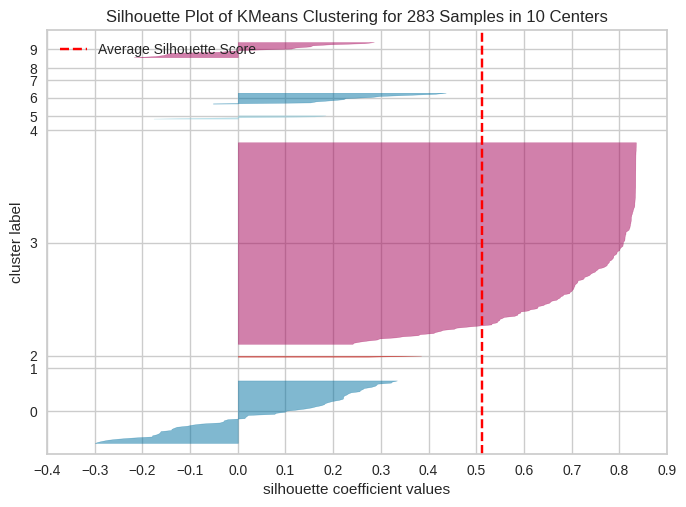

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 283 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [39]:
silhouette_visualizer(KMeans(10, random_state=42), scaled_x, colors='yellowbrick')

In [40]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_x)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'SSE for KMeans cluster range')

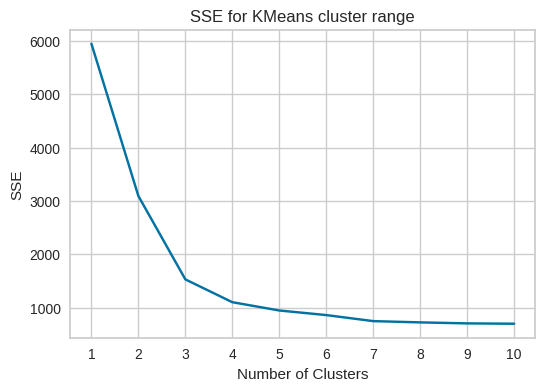

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans cluster range")

In [42]:
country_3_clusters = KMeans(n_clusters=3, random_state=42)

In [43]:
transformed_disbrsmnt_df['kmeans_3'] = country_3_clusters.fit_predict(scaled_x)

In [44]:
centers = country_3_clusters.cluster_centers_

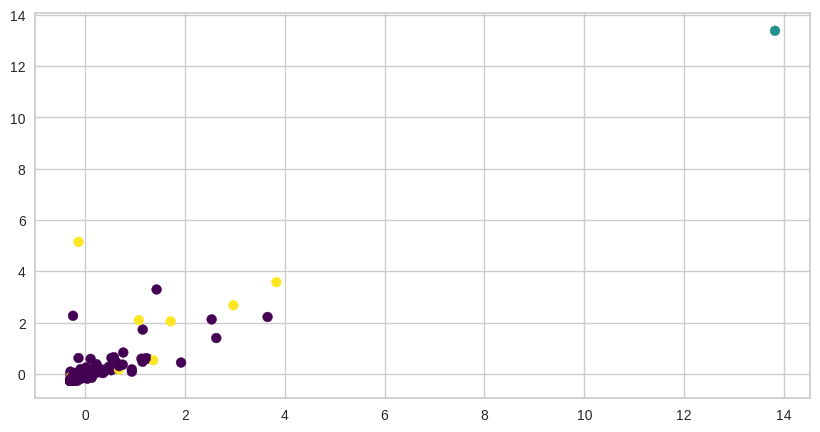

In [45]:
plt.figure(figsize=(10, 5))
plt.scatter(scaled_x[:, 0], scaled_x[:, 1],
            c=transformed_disbrsmnt_df['kmeans_3'], s=50, cmap='viridis')

### Hierarchical clustering

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [47]:
mergings = linkage(scaled_x, method='ward')

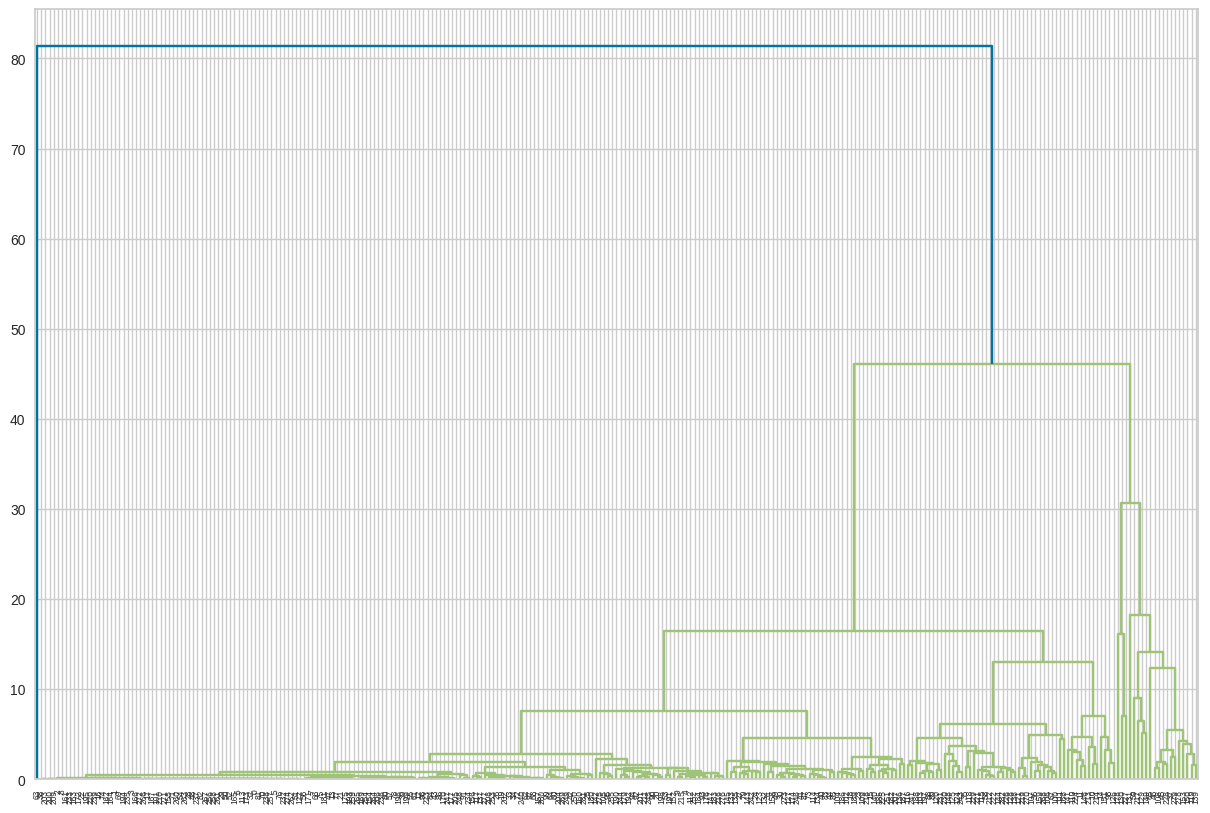

In [48]:
plt.figure(figsize=(15, 10))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

In [49]:
h_clust = AgglomerativeClustering(n_clusters=3, linkage="complete")

In [50]:
transformed_disbrsmnt_df['h_clust_3'] = h_clust.fit_predict(scaled_x)

In [51]:
transformed_disbrsmnt_df['h_clust_3'].value_counts()

0    281
1      1
2      1
Name: h_clust_3, dtype: int64

## Cluster analysis

In [52]:
transformed_disbrsmnt_df['kmeans_3'].value_counts()

0    274
2      8
1      1
Name: kmeans_3, dtype: int64

In [53]:
transformed_disbrsmnt_df.head(2)

fiscal_year,country_name,country_code,international_category_name,transaction_type_name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,kmeans_3,h_clust_3
0,Argentina,ARG,Administrative Costs,Disbursements,1636.0,1407.0,24858.0,10738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13710.0,NaN,NaN,NaN,NaN,NaN,NaN,32774.0,6209.0,0,0
1,Argentina,ARG,Agriculture,Disbursements,3197.0,NaN,NaN,NaN,NaN,NaN,107738.0,364632.0,73614.0,46954.0,59515.0,64155.0,173633.0,108585.0,193489.0,337003.0,247973.0,132089.0,255236.0,155002.0,224320.0,358654.0,0,0


In [54]:
transformed_disbrsmnt_df.groupby(["kmeans_3", "international_category_name"]).agg({"country_name":"unique"}).reset_index()

fiscal_year,kmeans_3,international_category_name,country_name
0,0,Administrative Costs,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."
1,0,Agriculture,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."
2,0,Commodity Assistance,"[Bolivia, Burma (Myanmar), Cambodia, Colombia,..."
3,0,Economic Growth,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."
4,0,Education,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."
5,0,Governance,"[Argentina, Bolivia, Brazil, Brunei, Burma (My..."
6,0,Health and Population,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."
7,0,Humanitarian,"[Argentina, Bolivia, Brazil, Brunei, Burma (My..."
8,0,Infrastructure,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."
9,0,Other,"[Argentina, Bolivia, Brazil, Burma (Myanmar), ..."


In [55]:
transformed_disbrsmnt_df[(transformed_disbrsmnt_df.country_name=="Haiti")]['international_category_name'].unique()

array(['Administrative Costs', 'Agriculture', 'Commodity Assistance',
       'Economic Growth', 'Education', 'Governance',
       'Health and Population', 'Humanitarian', 'Infrastructure', 'Other'],
      dtype=object)

## Cluster 1

In [56]:
transformed_disbrsmnt_df.query("kmeans_3 == 1")[['country_name', 'international_category_name']]

fiscal_year,country_name,international_category_name
63,Colombia,Governance


In [57]:
clus_1 = transformed_disbrsmnt_df[(transformed_disbrsmnt_df.country_name=='Colombia')
                         & (transformed_disbrsmnt_df.international_category_name=='Governance')]

In [58]:
clus_1

fiscal_year,country_name,country_code,international_category_name,transaction_type_name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,kmeans_3,h_clust_3
63,Colombia,COL,Governance,Disbursements,360849604.0,538653846.0,730245204.0,465196056.0,570823621.0,877275518.0,418981253.0,576943529.0,625174525.0,598497929.0,796864087.0,443538848.0,369133630.0,358158096.0,616582226.0,326856343.0,319439818.0,327160057.0,345858478.0,319855538.0,266347499.0,109626929.0,1,1


In [59]:
plt_df = clus_1.melt(id_vars=["country_name", "country_code", "kmeans_3", "h_clust_3",
                     "international_category_name" , "transaction_type_name"], 
        var_name="Year", 
        value_name="constant_dollar_amount")

In [60]:
plt_df

,country_name,country_code,kmeans_3,h_clust_3,international_category_name,transaction_type_name,Year,constant_dollar_amount
0,Colombia,COL,1,1,Governance,Disbursements,2001,360849604.0
1,Colombia,COL,1,1,Governance,Disbursements,2002,538653846.0
2,Colombia,COL,1,1,Governance,Disbursements,2003,730245204.0
3,Colombia,COL,1,1,Governance,Disbursements,2004,465196056.0
4,Colombia,COL,1,1,Governance,Disbursements,2005,570823621.0
5,Colombia,COL,1,1,Governance,Disbursements,2006,877275518.0
6,Colombia,COL,1,1,Governance,Disbursements,2007,418981253.0
7,Colombia,COL,1,1,Governance,Disbursements,2008,576943529.0
8,Colombia,COL,1,1,Governance,Disbursements,2009,625174525.0
9,Colombia,COL,1,1,Governance,Disbursements,2010,598497929.0


<AxesSubplot:xlabel='Year', ylabel='constant_dollar_amount'>

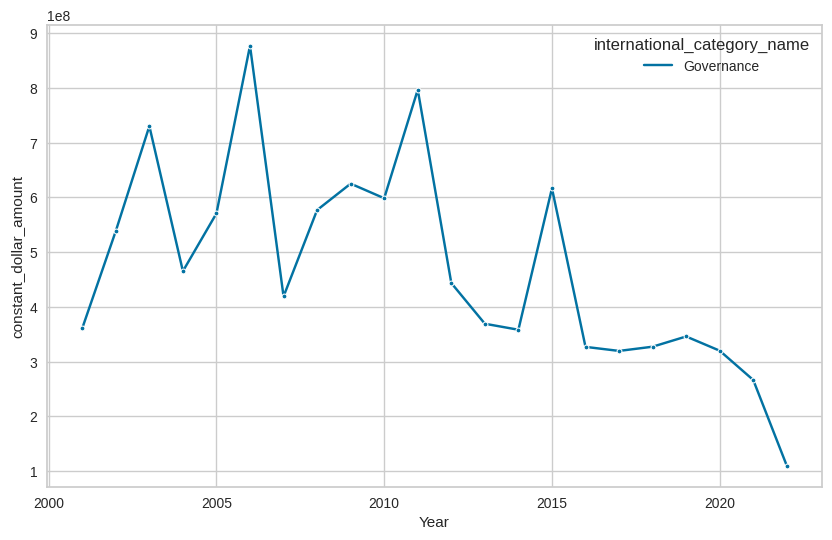

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = "Year", y = "constant_dollar_amount",
             data = plt_df, hue="international_category_name", marker=".")

US Aid to Colombia for Governance has been declining since 2015. 

Could this mean that Colombia no longer require Aid for Governance or US Embassy did not find any impact of this US aid from Colombia?

Is it same for rest of the US Aid in Colombia?

In [62]:
plt_df = transformed_disbrsmnt_df[(transformed_disbrsmnt_df.country_name=="Colombia")]\
        .melt(id_vars=["country_name", "country_code", "kmeans_3", "h_clust_3",
                     "international_category_name" , "transaction_type_name"], 
              var_name="Year", 
              value_name="constant_dollar_amount")

In [63]:
plt_df

,country_name,country_code,kmeans_3,h_clust_3,international_category_name,transaction_type_name,Year,constant_dollar_amount
0,Colombia,COL,0,0,Administrative Costs,Disbursements,2001,4859704.0
1,Colombia,COL,2,0,Agriculture,Disbursements,2001,4164397.0
2,Colombia,COL,0,0,Commodity Assistance,Disbursements,2001,NaN
3,Colombia,COL,0,0,Economic Growth,Disbursements,2001,374029.0
4,Colombia,COL,0,0,Education,Disbursements,2001,NaN
...,...,...,...,...,...,...,...,...
215,Colombia,COL,1,1,Governance,Disbursements,2022,109626929.0
216,Colombia,COL,0,0,Health and Population,Disbursements,2022,10987346.0
217,Colombia,COL,0,0,Humanitarian,Disbursements,2022,220219236.0
218,Colombia,COL,0,0,Infrastructure,Disbursements,2022,1722153.0


Text(0.5, 1.0, 'Different US Aid types in Colombia - Disbursements')

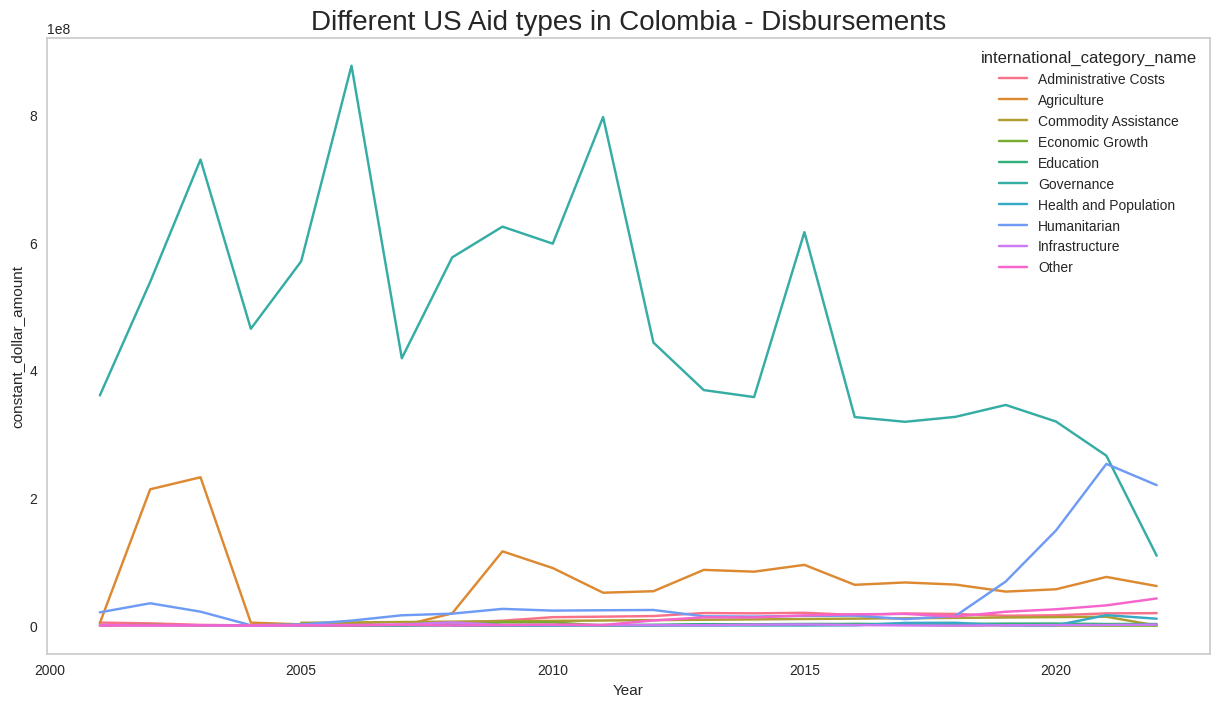

In [64]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "Year", y = "constant_dollar_amount",
             data = plt_df, hue="international_category_name")
plt.grid(False)
plt.title("Different US Aid types in Colombia - Disbursements", size=20)

<AxesSubplot:xlabel='constant_dollar_amount', ylabel='international_category_name'>

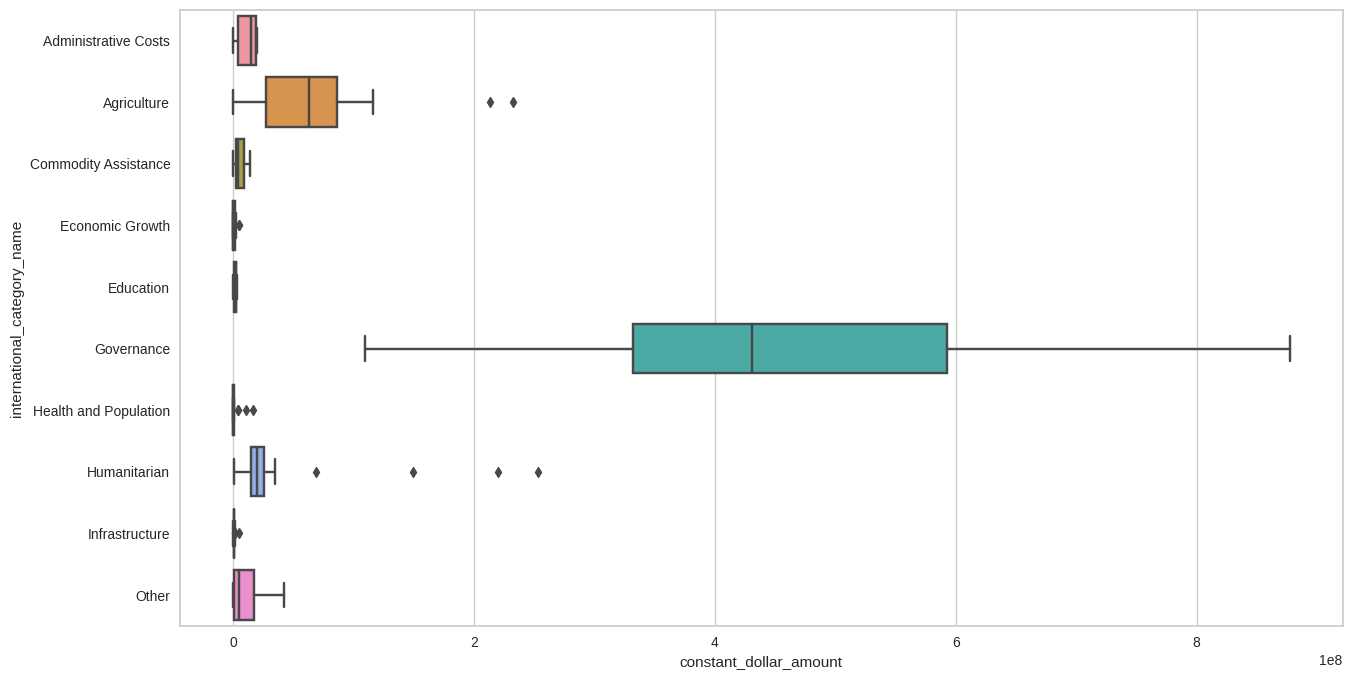

In [65]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = "constant_dollar_amount",  y = "international_category_name", data = plt_df)

In [66]:
raw_us_aid.head()

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.00
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.00
2,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,125446,76,USAID redacted this field in accordance with t...,USAID redacted this field in accordance with t...,OE,NaN,NaN,NaN,2,Obligations,2002,01OCT2001,-996,-1397,11781,110,1,,Latin America,-0.00
3,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not includ

In [67]:
raw_us_aid.groupby(['foreign_assistance_objective_name', 'fiscal_year']).size().reset_index().sort_values("fiscal_year")

,foreign_assistance_objective_name,fiscal_year,0
0,Economic,1946,33
78,Military,1947,1
1,Economic,1947,36
2,Economic,1948,34
79,Military,1948,1
...,...,...,...
152,Military,2021,30
75,Economic,2021,71678
76,Economic,2022,42413
153,Military,2022,6


# Level - 2

In [68]:
raw_us_aid.country_name.unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Brunei', 'Burma (Myanmar)',
       'Cambodia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'French Guiana',
       'Guatemala', 'Haiti', 'Honduras', 'Indonesia', 'Laos', 'Malaysia',
       'Martinique', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Timor-Leste', 'Singapore', 'Vietnam', 'Thailand',
       'Uruguay', 'Venezuela'], dtype=object)

In [69]:
raw_us_aid.foreign_assistance_objective_name.value_counts()

Economic    632110
Military      7710
Name: foreign_assistance_objective_name, dtype: int64

In [70]:
lvl_2_tr_disbrs = transformForClustering(disbrsmnt_df,
                                         levels=['country_name', "country_code", "region_extd",
                                                   "foreign_assistance_objective_name", "transaction_type_name"])

In [71]:
lvl_2_tr_disbrs = lvl_2_tr_disbrs.drop(columns=[2023, "All"], axis=1)[:-1]

In [72]:
lvl_2_tr_disbrs.region_extd.value_counts()

Latin America      43
South East Asia    20
Name: region_extd, dtype: int64

## Latin America

In [73]:
lat_amr_lvl_2 = lvl_2_tr_disbrs.query("region_extd=='Latin America'")

In [74]:
X = lat_amr_lvl_2.iloc[:,5:-1]

In [75]:
X.fillna(0, inplace=True)

In [76]:
scaled_x = scaler.fit_transform(X)

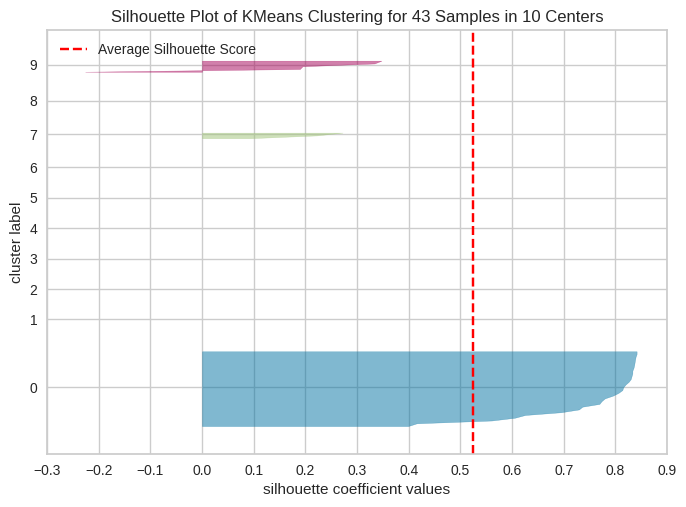

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 43 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [77]:
silhouette_visualizer(KMeans(10, random_state=42), X, colors='yellowbrick')

In [78]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'SSE for KMeans cluster range')

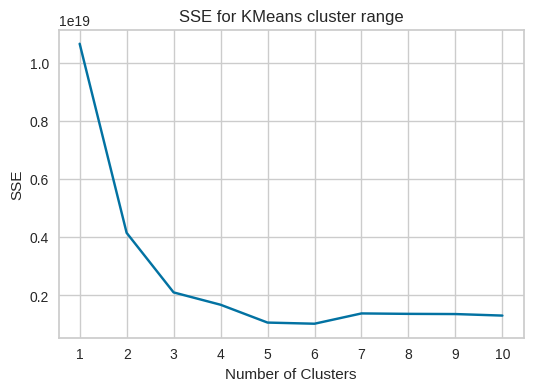

In [79]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans cluster range")

In [80]:
lat_amr_cluster_3 = KMeans(n_clusters=3, random_state=42)

In [81]:
lat_amr_lvl_2['kmeans_3'] = lat_amr_cluster_3.fit_predict(scaled_x)

### Cluster analysis

In [82]:
lat_amr_lvl_2.kmeans_3.value_counts()

0    33
2     8
1     2
Name: kmeans_3, dtype: int64

In [83]:
lat_amr_lvl_2.groupby(['kmeans_3', 'country_name'])\
        .agg({'foreign_assistance_objective_name':'unique'}).reset_index()

fiscal_year,kmeans_3,country_name,foreign_assistance_objective_name
0,0,Argentina,"[Economic, Military]"
1,0,Bolivia,[Military]
2,0,Brazil,"[Economic, Military]"
3,0,Chile,"[Economic, Military]"
4,0,Costa Rica,"[Economic, Military]"
5,0,Cuba,[Economic]
6,0,Dominican Republic,"[Economic, Military]"
7,0,Ecuador,"[Economic, Military]"
8,0,El Salvador,[Military]
9,0,French Guiana,[Economic]


In [84]:
lat_amr_lvl_2.groupby(['kmeans_3', 'foreign_assistance_objective_name'])\
        .agg({'country_name':'unique'}).reset_index()

fiscal_year,kmeans_3,foreign_assistance_objective_name,country_name
0,0,Economic,"[Argentina, Brazil, Chile, Costa Rica, Cuba, D..."
1,0,Military,"[Argentina, Bolivia, Brazil, Chile, Costa Rica..."
2,1,Economic,"[Colombia, Haiti]"
3,2,Economic,"[Bolivia, El Salvador, Guatemala, Honduras, Me..."
4,2,Military,[Colombia]


In [85]:
centers = lat_amr_cluster_3.cluster_centers_

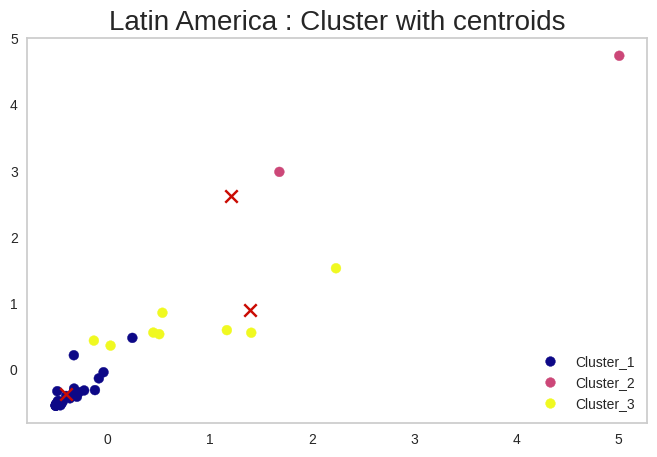

In [86]:
classes = ['Cluster_1', 'Cluster_2', 'Cluster_3']
plt.figure(figsize=(8, 5))
scatter = plt.scatter(scaled_x[:, 5], scaled_x[:, 8],
            c=lat_amr_lvl_2['kmeans_3'], s=50, cmap='plasma')
plt.scatter(centers[:,0] , centers[:,1] , s = 80, color = 'r', marker='x')
plt.title("Latin America : Cluster with centroids", size = 20)
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc = "lower right")
plt.grid(False)

## South East Asia

In [87]:
south_est_asia_lvl_2 = lvl_2_tr_disbrs.query("region_extd!='Latin America'")

In [88]:
south_est_asia_lvl_2.head(3)

fiscal_year,country_name,country_code,region_extd,foreign_assistance_objective_name,transaction_type_name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,Brunei,BRN,South East Asia,Economic,Disbursements,NaN,NaN,NaN,NaN,52249.0,1919.0,NaN,NaN,NaN,10701.0,NaN,4497.0,NaN,266636.0,102062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Brunei,BRN,South East Asia,Military,Disbursements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30180.0,NaN,NaN,49883.0,NaN,NaN,NaN,5799.0,352457.0,NaN,NaN,1041.0,NaN,NaN,NaN
8,Burma (Myanmar),MMR,South East Asia,Economic,Disbursements,2610083.0,6478379.0,11941835.0,8696204.0,5068222.0,13802142.0,18625978.0,60909331.0,56797917.0,34260850.0,38465432.0,34070365.0,69633700.0,105793647.0,122165762.0,164883297.0,156485682.0,153624448.0,141708176.0,178014914.0,162777130.0,182847951.0


In [89]:
X = south_est_asia_lvl_2.iloc[:,5:-1]

In [90]:
X.fillna(value=0, inplace=True)

In [91]:
scaled_x = scaler.fit_transform(X)

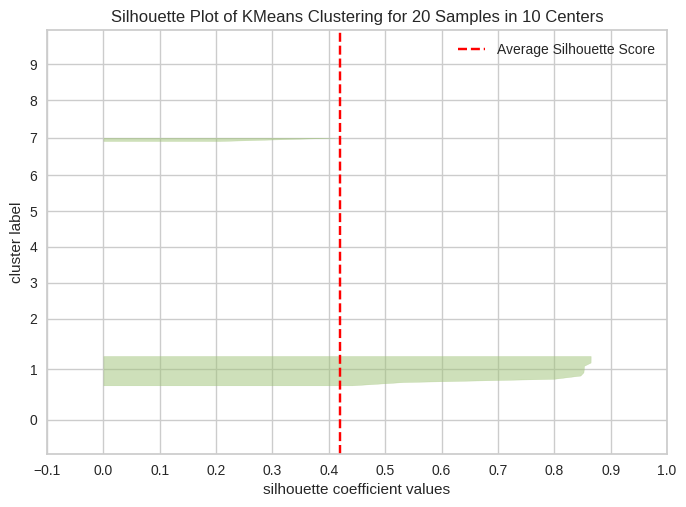

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [92]:
silhouette_visualizer(KMeans(10, random_state=42), scaled_x, colors='yellowbrick')

In [93]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'SSE for KMeans cluster range')

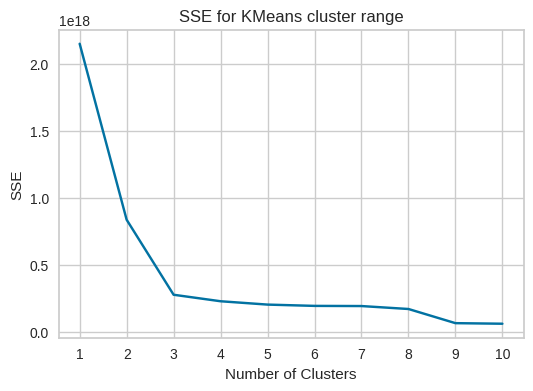

In [94]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans cluster range")

In [95]:
southest_asia_cluster_3 = KMeans(n_clusters=3, random_state=42)

In [96]:
south_est_asia_lvl_2['kmeans_3'] = southest_asia_cluster_3.fit_predict(scaled_x)

### Cluster analysis

In [97]:
south_est_asia_lvl_2.kmeans_3.value_counts()

0    14
2     4
1     2
Name: kmeans_3, dtype: int64

In [98]:
south_est_asia_lvl_2.groupby(['kmeans_3', 'country_name'])\
        .agg({'foreign_assistance_objective_name':'unique'}).reset_index()

fiscal_year,kmeans_3,country_name,foreign_assistance_objective_name
0,0,Brunei,"[Economic, Military]"
1,0,Burma (Myanmar),[Military]
2,0,Cambodia,[Military]
3,0,Indonesia,[Military]
4,0,Laos,"[Economic, Military]"
5,0,Malaysia,"[Economic, Military]"
6,0,Singapore,"[Economic, Military]"
7,0,Thailand,[Military]
8,0,Timor-Leste,"[Economic, Military]"
9,1,Indonesia,[Economic]


In [99]:
south_est_asia_lvl_2.groupby(['kmeans_3', 'foreign_assistance_objective_name'])\
        .agg({'country_name':'unique'}).reset_index()

fiscal_year,kmeans_3,foreign_assistance_objective_name,country_name
0,0,Economic,"[Brunei, Laos, Malaysia, Singapore, Timor-Leste]"
1,0,Military,"[Brunei, Burma (Myanmar), Cambodia, Indonesia,..."
2,1,Economic,"[Indonesia, Philippines]"
3,2,Economic,"[Burma (Myanmar), Cambodia, Thailand]"
4,2,Military,[Philippines]


In [100]:
centers = southest_asia_cluster_3.cluster_centers_

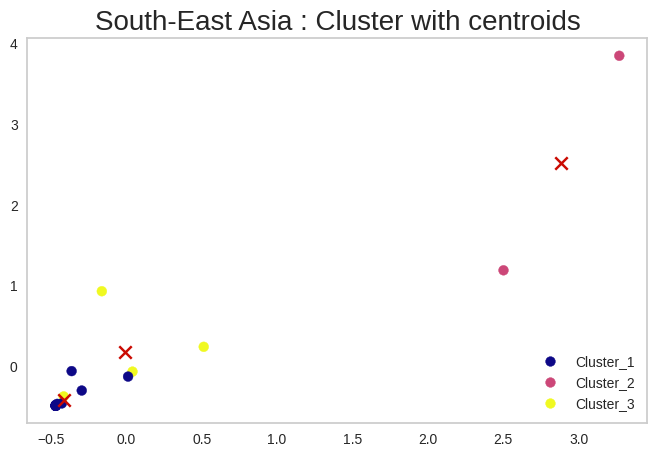

In [101]:
classes = ['Cluster_1', 'Cluster_2', 'Cluster_3']
plt.figure(figsize=(8, 5))
scatter = plt.scatter(scaled_x[:, 0], scaled_x[:, 1],
            c=south_est_asia_lvl_2['kmeans_3'], s=50, cmap='plasma')
plt.scatter(centers[:,0] , centers[:,1] , s = 80, color = 'r', marker='x')
plt.title("South-East Asia : Cluster with centroids", size = 20)
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc = "lower right")
plt.grid(False)

### Visualizations for presentation

In [102]:
import geopandas as gpd

In [103]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [104]:
world.rename({'iso_a3':"country_code"}, axis=1, inplace=True)

In [105]:
lat_amr_lvl_2.country_code.isin(world.country_code).value_counts()

True     41
False     2
Name: country_code, dtype: int64

In [106]:
south_est_asia_lvl_2.country_code.isin(world.country_code).value_counts()

True     18
False     2
Name: country_code, dtype: int64

In [107]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

# Add indicators

In [108]:
# filter for priority countries
pvrty_df = raw_pvrty_df[raw_pvrty_df.country_code.isin(raw_us_aid.country_code)]

In [109]:
pvrty_df.shape

(31, 66)

In [110]:
pvrty_df = pvrty_df.merge(raw_us_aid[['country_code', "region_extd"]], how = 'left', on = 'country_code')\
                    .drop_duplicates(['country_code'])

In [111]:
pvrty_df.shape

(31, 67)

In [112]:
pvrty_df.indicator_name.unique()

array(['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'],
      dtype=object)

In [113]:
plt_df = pvrty_df.melt(id_vars=['country_name', 'country_code' ,
                                'indicator_name' , 'indicator_code', 'region_extd'], var_name = "Year")

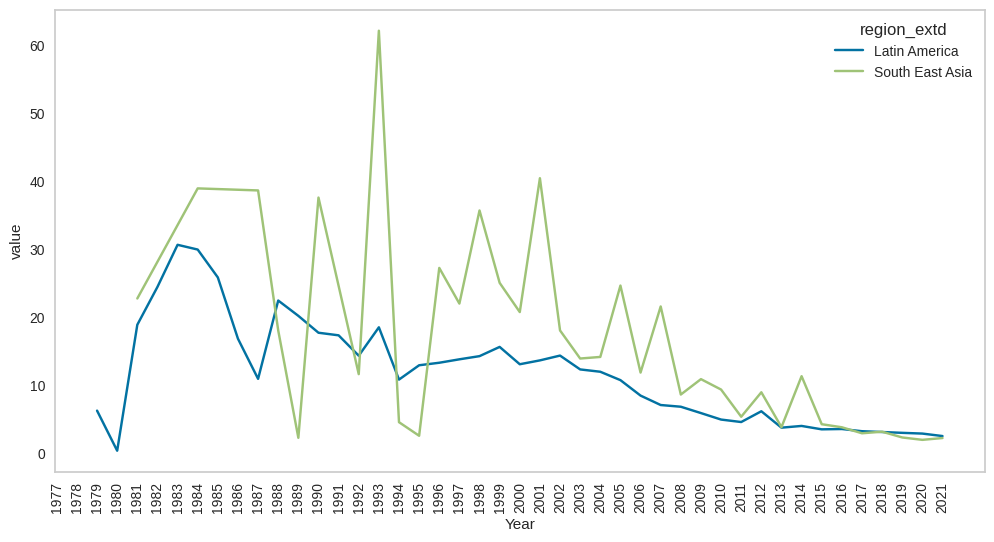

In [114]:
f, axarr = plt.subplots(1, figsize=(12,6), sharex=True)
sns.lineplot(x='Year', y = "value", data = plt_df, hue = "region_extd", ci = None)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [115]:
raw_us_aid.head()

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.00
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.00
2,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,125446,76,USAID redacted this field in accordance with t...,USAID redacted this field in accordance with t...,OE,NaN,NaN,NaN,2,Obligations,2002,01OCT2001,-996,-1397,11781,110,1,,Latin America,-0.00
3,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not includ

In [116]:
list(raw_us_aid.activity_description.unique())

['OE Trust Funds',
 'USAID redacted this field in accordance with the exceptions outlined in the Foreign Aid Transparency and Accountability Act of 2016.',
 'ESF',
 'USAID Loans',
 'USAID Grants',
 'ESF adjustment for USAID Loans and Grants',
 'U.S. Department of State: Bureau of Western Hemisphere Affairs. Covers grants (including revenue-sharing), subsidies, gratuities, and other aid for which cash payments are made to states, other political subdivisions, corporations, associations, and individuals; contributions to international societies, commissions, proceedings, or projects, whether in lump sum or as quotas of expenses; contributions fixed by treaty; grants to foreign countries; taxes imposed by taxing authorities where the Federal Government has consented to taxation (excluding the employers share of Federal Insurance Contribution Act taxes); and payments in lieu of taxes. Includes readjustment and other benefits for veterans, other than indemnities for death or disability.',
 

In [118]:
raw_us_aid.groupby(['region_extd']).agg({'country_name':'nunique'}).reset_index()

,region_extd,country_name
0,Latin America,23
1,South East Asia,10


In [120]:
raw_us_aid.groupby(['region_extd']).agg({'region_name':'unique'}).reset_index()

,region_extd,region_name
0,Latin America,"[Western Hemisphere, East Asia and Oceania]"
1,South East Asia,[East Asia and Oceania]


In [122]:
raw_us_aid.aid_type_group_name.unique()

array(['Administrative Costs', 'Project-Type', 'Technical Assistance',
       'Core contributions', 'Other', 'Budget support'], dtype=object)

In [123]:
raw_us_aid.head()

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id,Year,region_extd,amount_in_mil
0,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,2,Obligations,2001,NaN,3145,4485,7767,110,1,,Latin America,0.00
1,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,121438,76,OE TRUSFUNDS COR,OE Trust Funds,OE,NaN,NaN,NaN,3,Disbursements,2001,NaN,1147,1636,7767,110,1,,Latin America,0.00
2,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,125446,76,USAID redacted this field in accordance with t...,USAID redacted this field in accordance with t...,OE,NaN,NaN,NaN,2,Obligations,2002,01OCT2001,-996,-1397,11781,110,1,,Latin America,-0.00
3,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,23,EE,Bureau for Europe and Eurasia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,72x1000,"Agency for International Development, Operatin...",1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,17,Administrative costs not includ